#UNTUK LKTI JAMSTATT SEMANGAT FELII

IMPORT DATA

In [1]:
import sys
print(sys.executable)

d:\UNMUL\Lomba\LKTI Jamstat XV\Coding VSC KTI\venv\Scripts\python.exe


In [2]:
import pandas as pd

In [4]:
df=pd.read_csv("Coba6 Data Rapi Kuisioner Resp Kaltim (Responses).csv")
df.head()

,X1,X2,X3,X4,Y
0,15,26,17,10,2
1,7,13,10,11,2
2,10,14,10,12,2
3,8,25,9,10,2
4,9,15,11,6,2


EXPLANATORY DATA ANALYSIS (EDA)
1. LIHAT STRUKTUR DATA

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      304 non-null    int64
 1   X2      304 non-null    int64
 2   X3      304 non-null    int64
 3   X4      304 non-null    int64
 4   Y       304 non-null    int64
dtypes: int64(5)
memory usage: 12.0 KB


2. STATISTIKA DESKRIPTIF

In [6]:
df.describe()

,X1,X2,X3,X4,Y
count,304.000000,304.000000,304.00000,304.000000,304.000000
mean,9.779605,19.322368,10.56250,8.516447,2.082237
std,2.547395,4.795628,3.67976,3.503849,0.577190
min,3.000000,6.000000,4.00000,4.000000,1.000000
25%,8.000000,16.000000,8.00000,6.000000,2.000000
50%,10.000000,19.000000,10.00000,8.000000,2.000000
75%,11.000000,23.000000,13.00000,11.000000,2.000000
max,15.000000,30.000000,20.00000,20.000000,3.000000


In [7]:
df.shape #mengetahui jumlah baris dan kolom

(304, 5)

In [8]:
df.duplicated().sum() #ada data yang duplikat

9

In [9]:
list(df[df.duplicated()].index) #mengetahui indeks dari data yang duplikat, untuk memastikan bahwa data yang duplikat tersebut memang dari responden yang berbeda

[137, 152, 169, 186, 196, 201, 205, 222, 302]

In [10]:
df[df.duplicated(keep=False)].sort_values(by=["X1","X2","X3","X4","Y"]) #ini pasangan data yang duplikat, terlihat bahwa memang data berasal dari responden yang berbeda sehingga tidak kita hapus

,X1,X2,X3,X4,Y
113,9,18,12,12,2
169,9,18,12,12,2
201,9,18,12,12,2
302,9,18,12,12,2
108,10,20,11,7,2
196,10,20,11,7,2
104,10,20,11,13,2
186,10,20,11,13,2
45,10,22,8,6,2
152,10,22,8,6,2


In [11]:
df.isnull().sum() #untuk mengetahui apakah ada data yang kosong, dan ternyata tidak ada

X1    0
X2    0
X3    0
X4    0
Y     0
dtype: int64

In [12]:
#Memisahkan variabel X dan Y
X=df.drop("Y",axis=1)
y=df["Y"]

EXPLANATORY DATA ANALYSIS (EDA)

In [13]:
df['Y'].value_counts() #terlihat bahwa ada data imbalanced

Y
2    201
3     64
1     39
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
test_size=0.1, #untuk 10% testing
random_state=0,
stratify=y)#untuk menjaga proporsi kelas tetap sama pada data train dan test

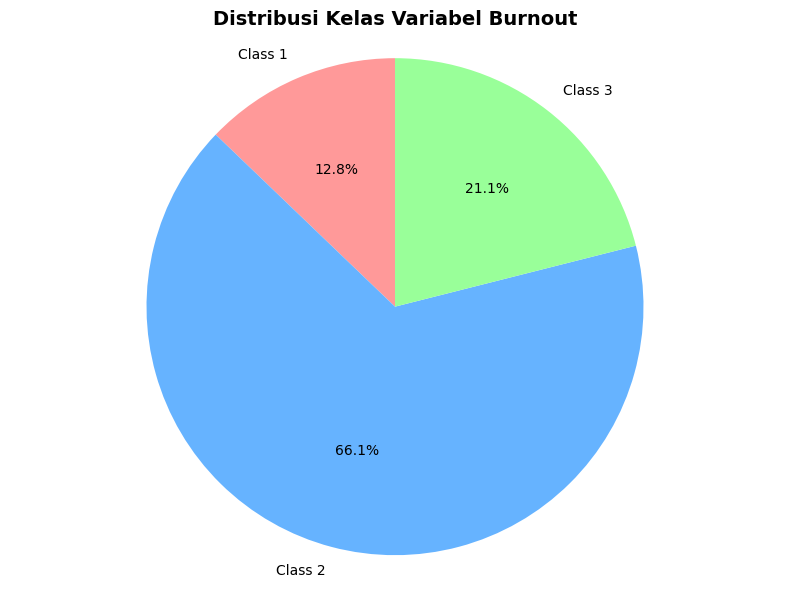

Class Distribution:
Y
1     39
2    201
3     64
Name: count, dtype: int64


In [15]:
# =========================
# Pie Chart untuk Y Variable
# =========================
import matplotlib.pyplot as plt

# Hitung jumlah setiap kelas
y_counts = y.value_counts().sort_index()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(y_counts.values, 
        labels=[f'Class {int(label)}' for label in y_counts.index], 
        autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff', '#99ff99'],
        startangle=90)
plt.title('Distribusi Kelas Variabel Burnout', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"Class Distribution:\n{y_counts}")

RANDOM FOREST

In [16]:
# =========================
# 1. Import Library
# =========================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
model=RandomForestClassifier(
    n_estimators=500, #jumlah pohon
    max_depth=20, #kedalaman maksimal pohon
    min_samples_leaf=2, #jumlah minimum sampel pada daun
    class_weight='balanced'
)

model.fit(X_train,y_train)
print(model.score(X_test,y_test))
pred2=model.predict(X_test)

0.8064516129032258


In [19]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           1       0.40      0.50      0.44         4
           2       0.85      0.85      0.85        20
           3       1.00      0.86      0.92         7

    accuracy                           0.81        31
   macro avg       0.75      0.74      0.74        31
weighted avg       0.83      0.81      0.81        31



Text(0.5, 1.0, 'confusion matriks untuk random forest')

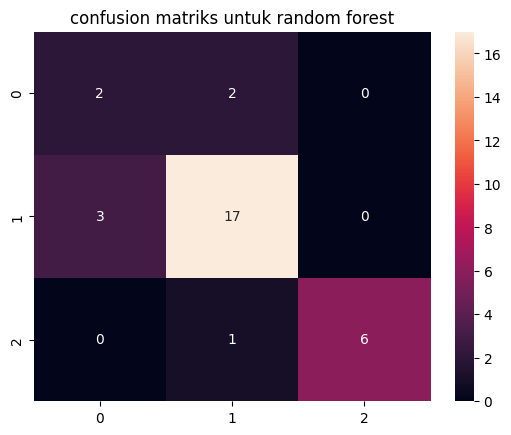

In [20]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test, pred2)
sns.heatmap(cn,annot=True)
plt.title("confusion matriks untuk random forest")

In [21]:
import pickle

In [22]:
#simpan model ke file
with open("model_rf_kti","wb") as file:
    pickle.dump(model,file)